In [1]:
import warnings

warnings.filterwarnings("ignore")

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "uniform_sampler"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count=10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.043639,0.050680,-0.064499,0.007907,-0.085557,0.056352,-0.014499,-0.025696,0.045861,0.070448,139.982722
1,-0.064498,0.050680,0.004595,0.048537,-0.112774,0.155030,-0.069738,0.120226,0.023327,0.045775,38.645648
2,-0.087794,-0.044642,0.067674,-0.050623,-0.063164,-0.105870,0.089031,0.034704,0.089681,-0.106136,182.510625
3,0.020967,0.050680,0.078174,0.119279,0.112428,-0.038697,0.055484,-0.013412,-0.000444,0.060500,197.420599
4,-0.092856,-0.044642,-0.077115,0.023810,0.131951,-0.083861,0.177596,0.044294,-0.095230,0.006819,88.419177
5,0.041950,-0.044642,0.136234,0.099651,0.048548,0.125917,0.051628,0.176201,0.082670,-0.128292,261.635455
6,0.084952,0.050680,0.074190,0.130651,0.041208,0.046693,0.052800,-0.041121,-0.056059,0.132064,95.100612
7,0.094078,0.050680,-0.081910,-0.039181,0.046044,0.162486,-0.004205,0.183104,-0.077153,0.128135,159.418024
8,-0.054991,0.050680,0.064216,-0.104390,0.025081,0.003204,0.122677,0.050471,0.086277,0.054976,239.379430
9,0.025579,-0.044642,0.037313,-0.095632,-0.019108,0.005121,0.125617,0.176449,0.003501,-0.046430,33.855958


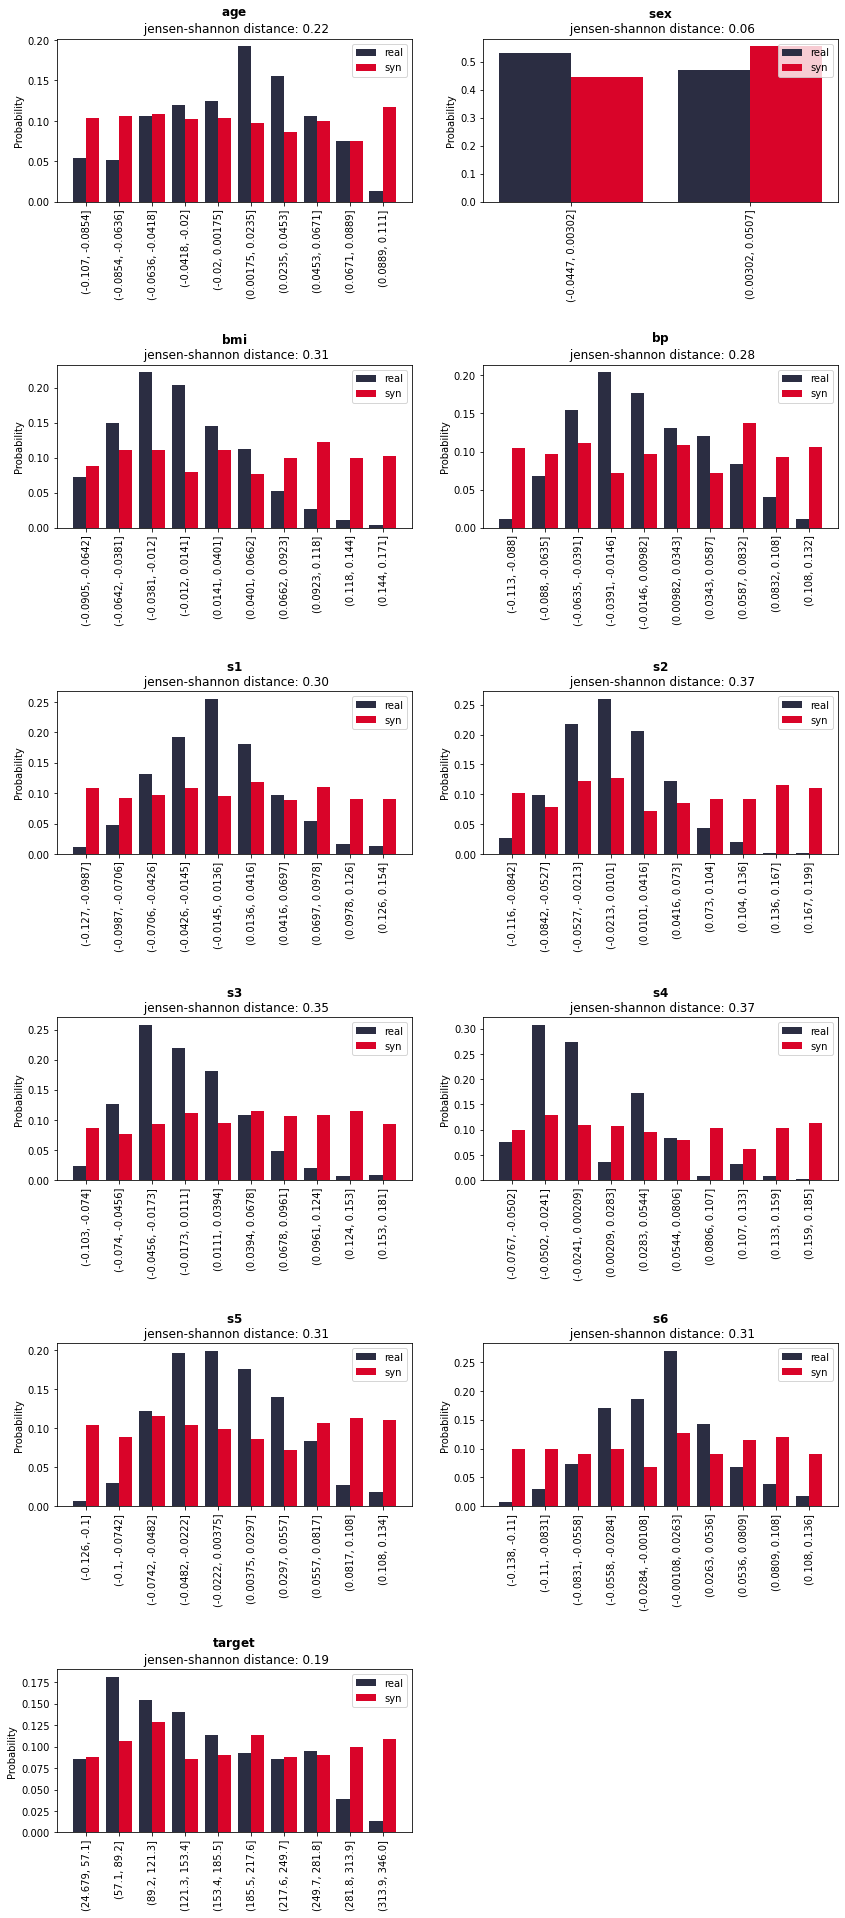

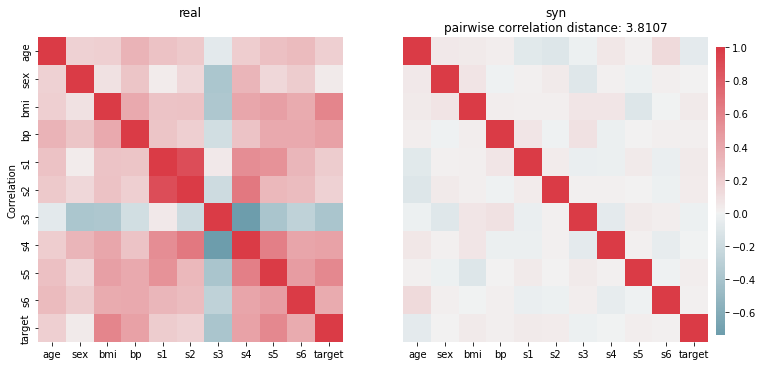

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate([eval_plugin], X, sensitive_columns=["sex"], repeats=3,)

In [7]:
Benchmarks.print(score)


Plugin : uniform_sampler


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch.score,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.0
sanity.common_rows_proportion.score,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.0
sanity.nearest_syn_neighbor_distance.mean,0.12975,0.23302,0.185853,0.042631,0.194789,0.051635,3,0,0.0
sanity.close_values_probability.score,0.611898,0.815864,0.699717,0.085644,0.671388,0.101983,3,0,0.0
sanity.distant_values_probability.score,0.008499,0.016997,0.012276,0.003533,0.011331,0.004249,3,0,0.0
stats.jensenshannon_dist.marginal,0.274611,0.277037,0.275656,0.001018,0.275321,0.001213,3,0,0.07
stats.chi_squared_test.marginal,0.994419,0.998147,0.996896,0.001751,0.998122,0.001864,3,0,0.01
stats.feature_corr.joint,3.874627,3.970372,3.937726,0.044627,3.968179,0.047873,3,0,0.04
stats.inv_kl_divergence.marginal,0.767613,0.77571,0.770926,0.003466,0.769453,0.004048,3,0,0.01
stats.ks_test.marginal,0.753026,0.762555,0.758863,0.004176,0.76101,0.004764,3,0,0.0
